In [2]:
!pip install haversine

In [3]:
import haversine

De nos jours les entreprises veulent tout personnaliser car cela crée beaucoup d’espace pour une concurrence saine et des opportunités pour faire preuve de créativité dans la façon dont elles acquièrent et conservent leurs clients.

L’une des étapes fondamentales vers une meilleure personnalisation est la segmentation. Ainsi, une segmentation appropriée aidera l’entreprise à pendre des décisions concernant les nouvelles fonctionnalités, les nouveaux produits, la tarification (prix), les stratégies de marketing…

Cependant,faire de la segmentation manuellement est épuisant voire impossible. Ne serait-il donc pas plus opportun d’utiliser l’apprentissage automatique non supervisé?

                            Customer Segmentation
# Plan

    I)Importation des librairies

    II)Chargement des données

    III)Analyse exploratoire

    IV)Nettoyage des données

    V)Réduction de dimentionnalité
    
    VI)Clustering
    
        Clustering avec k-means
        
        Clustering avec la méthode de la silhouette
        
    VII)Evaluation des modéles
    
        LinearSVC
        
        Logostic Regression
        
        k-Nearest Neighbors
        
        KNeighbors avec manhattan
        
        Random Forest
        
        Gradient Boosting
        
        Baggin
        

Conclusion


In [1]:
!pip install yellowbrick

In [18]:
!pip install fancyimpute

  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=a3bef1981864aabe0a29dd4dd2f3aa9f2ff7227e09a943144a2ec77fc80ca89e
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\f9\fc\6a\b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=05edea948b008f9ce74af1cb6516837fdb6f45500fa2c2bd609aa1129ebee2ec
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\88\c4\be\e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute


#  I) ANALYSE EXOPLORATOIRE
Cette partie consiste à importer les librairies necessaires, à charger les données et à faire l'analyse.  

## 1) IMPORTING LIBRARIES (IMPORTATION DES DONNEES)

# <p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:200%;text-align:center;border-radius:10px 10px;">Prepare Olist dataset</p>

<img src="https://raw.githubusercontent.com/meafekih/Preparation-Olist-dataset/master/ecommerce-brazil.jpg">

<h3>
In this tiny Notebook, I will collect all tables of Olist dataset in one dataframe, and cleaning the result.
All my future studies about Olist dataset, will be starting from the result of this notebook.
</h3>

<a id='top'></a>
<p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>

       
* [1. ABOUT DATASET](#1)
    
    
* [2. IMPORTATION DES DONNEES ET DES LIBRARIES](#2)
 
    
* [3. MERGE TABLES](#3) 
          
* [4. CLEAN DATA](#4)

* [5. CORRECTION ET REDFINITION DE VARIABLE ](#5)

* [6. CLUSTERING](#6)


* [7. PCA](#7)



# <a id="1"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">ABOUT DATASET</p>

# <a id="2"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">IMPORTATION DES LIBRAIRIES & DES DONNEES</p>

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib as mat
import matplotlib.patches as mpatches
from sklearn.ensemble import IsolationForest
from sklearn. model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## LOADING DATA(chargement des données)

In [2]:
import os
os.getcwd()

'C:\\Users\\Hp\\OneDrive\\Bureau\\IMPORT ISE2\\Initiation au big data et au cloud campiting\\PROJET DE MACHINE LEARNING'

In [3]:
os.chdir(r'C:\Users\Hp\OneDrive\Bureau\IMPORT ISE2\Initiation au big data et au cloud campiting\LES DONNEES DU PROJET')

In [4]:
data1=pd.read_csv('olist_customers_dataset.csv')
data8=pd.read_csv('olist_geolocation_dataset.csv')
data9=pd.read_csv('olist_order_items_dataset.csv')
data3=pd.read_csv('olist_order_payments_dataset.csv')
data4=pd.read_csv('olist_order_reviews_dataset.csv')
data2=pd.read_csv('olist_orders_dataset.csv')
data5=pd.read_csv('olist_products_dataset.csv')
data6=pd.read_csv('olist_sellers_dataset.csv')

In [6]:
sources = [data1, data2, data3, 
           data4, data5, data6, data8 ,data9]
names =["data1","data2","data3","data4","data5","data6","data8","data9"]

In [7]:
# projetons pour voir nos differntes variables dans chaque base
d = {}
for i in range(len(sources)):
    d["{}".format(names[i])] = pd.Series(list(sources[i].columns))

D = pd.DataFrame.from_dict(d).fillna("")
D

data1                          data2  \
0               customer_id                       order_id   
1        customer_unique_id                    customer_id   
2  customer_zip_code_prefix                   order_status   
3             customer_city       order_purchase_timestamp   
4            customer_state              order_approved_at   
5                             order_delivered_carrier_date   
6                            order_delivered_customer_date   
7                            order_estimated_delivery_date   
8                                                            

                  data3                    data4                       data5  \
0              order_id                review_id                  product_id   
1    payment_sequential                 order_id       product_category_name   
2          payment_type             review_score         product_name_lenght   
3  payment_installments     review_comment_title  product_description_lenght   
4         payment_value   review_comment_message          product_photos_qty   
5                           review_creation_date            product_weight_g   
6                        review_answer_timestamp           product_length_cm   
7                                                          product_height_cm   
8                                                           product_width_cm   

                    data6                        data8                data9  
0               seller_id  geolocation_zip_code_prefix             order_id  
1  seller_zip_code_prefix              geolocation_lat        order_item_id  
2             seller_city              geolocation_lng           product_id  
3            seller_state             geolocation_city            seller_id  
4                                    geolocation_state  shipping_limit_date  
5                                                                     price  
6                                                             freight_value  
7                                                                            
8

# <a id="3"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">MERGE TABLES</p>
## All in one

In [5]:
data8.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
data1.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [6]:
data_R=pd.merge(data1,data8,on='zip_code_prefix')

In [7]:
data_R = data_R[['customer_id','customer_unique_id','customer_city', 'customer_state','geolocation_lat','geolocation_lng']].groupby('customer_unique_id').sum()

In [91]:
base_fision=pd.merge(data1,data2,on='customer_id')
base_fision1=pd.merge(base_fision,data3, on ="order_id")
base_fision2=pd.merge(base_fision1,data4, on ="order_id")
base_fision3=pd.merge(base_fision2,data9, on ="order_id")
base_fision4=pd.merge(base_fision3,data5, on ="product_id")
base_fision5=pd.merge(base_fision4,data6, on ="seller_id")

In [92]:
base_fusion=base_fision5

In [93]:
base_fusion=pd.merge(base_fision5,data_R, on ="customer_unique_id")

In [94]:
base_fusion.shape

(117017, 41)

In [12]:
base_fusion.head(5)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   zip_code_prefix    customer_city customer_state  \
0            14409           franca             SP   
1            68030         santarem             PA   
2            68030         santarem             PA   
3            92480  nova santa rita             RS   
4            25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

     order_approved_at order_delivered_carrier_date  ... product_photos_qty  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57  ...                1.0   
1  2017-11-10 00:47:48          2017-11-22 01:43:37  ...                1.0   
2  2017-11-10 00:47:48          2017-11-22 01:43:37  ...                1.0   
3  2017-05-08 22:22:56          2017-05-19 20:16:31  ...                1.0   
4  2018-02-04 22:29:19          2018-02-19 18:21:47  ...                1.0   

  product_weight_g  product_length_cm product_height_cm  product_width_cm  \
0           8683.0               54.0              64.0              31.0   
1           8683.0               54.0              64.0              31.0   
2           8683.0               54.0              64.0              31.0   
3           8683.0               54.0              64.0              31.0   
4           8683.0               54.0              64.0              31.0   

   seller_zip_code_prefix      seller_city  seller_state geolocation_lat  \
0                    8577  itaquaquecetuba            SP    -3013.277847   
1                    8577  itaquaquecetuba            SP     -156.301341   
2                    8577  itaquaquecetuba            SP     -156.301341   
3                    8577  itaquaquecetuba            SP    -2448.591605   
4                    8577  itaquaquecetuba            SP    -2216.296313   

  geolocation_lng  
0    -6967.348634  
1    -3502.300322  
2    -3502.300322  
3    -4204.372451  
4    -4230.778734  

[5 rows x 41 columns]

<AxesSubplot:ylabel='None'>

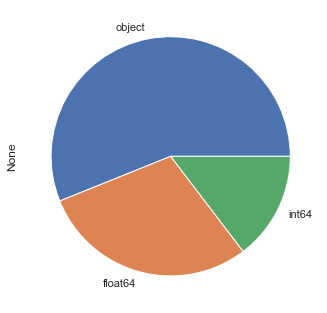

In [95]:
#les types de variables dans la base 
base_fusion.dtypes.value_counts().plot.pie()

<AxesSubplot:>

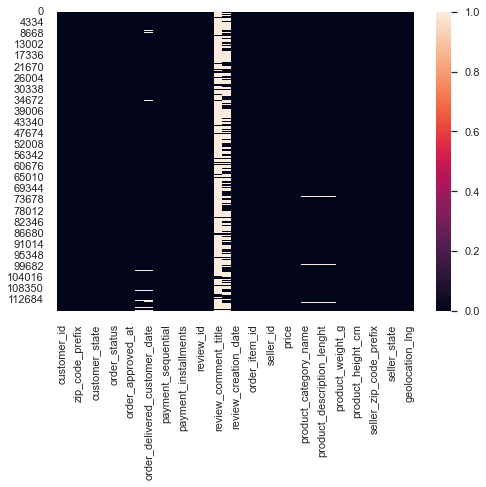

In [96]:
# abservation des variables dans la base
sns.heatmap(base_fusion.isna())

# <a id="4"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>
## Default review title and message

In [23]:
base_fusion['review_comment_title'] = base_fusion['review_comment_title'].fillna('No title')
base_fusion['review_comment_message'] = base_fusion['review_comment_message'].fillna('No message')

In [24]:
before_drop = base_fusion.shape[0]
base_fusion= base_fusion.dropna()
after_drop = base_fusion.shape[0]
print(f'There is {round(((before_drop-after_drop)/after_drop)*100,2)}% nan values ')

There is 3.63% nan values 


In [26]:
base_fusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112923 entries, 0 to 117016
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112923 non-null  object 
 1   customer_unique_id             112923 non-null  object 
 2   zip_code_prefix                112923 non-null  int64  
 3   customer_city                  112923 non-null  object 
 4   customer_state                 112923 non-null  object 
 5   order_id                       112923 non-null  object 
 6   order_status                   112923 non-null  object 
 7   order_purchase_timestamp       112923 non-null  object 
 8   order_approved_at              112923 non-null  object 
 9   order_delivered_carrier_date   112923 non-null  object 
 10  order_delivered_customer_date  112923 non-null  object 
 11  order_estimated_delivery_date  112923 non-null  object 
 12  payment_sequential            

In [27]:
# la description des variables 
base_fusion.describe(include='all')

customer_id                customer_unique_id  \
count                             112923                            112923   
unique                             94234                             91236   
top     270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
freq                                  63                                75   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        zip_code_prefix customer_city customer_state  \
count     112923.000000        112923         112923   
unique              NaN          4028             27   
top                 NaN     sao paulo             SP   
freq                NaN         17869          47807   
mean       35010.874915           NaN            NaN   
std        29854.926645           NaN            NaN   
min         1003.000000           NaN            NaN   
25%        11095.000000           NaN            NaN   
50%        24230.000000           NaN            NaN   
75%        58401.000000           NaN            NaN   
max        99980.000000           NaN            NaN   

                                order_id order_status  \
count                             112923       112923   
unique                             94234            2   
top     895ab968e7bb0d5659d16cd74cd1650c    delivered   
freq                                  63       112916   
mean                                 NaN          NaN   
std                                  NaN          NaN   
min                                  NaN          NaN   
25%                                  NaN          NaN   
50%                                  NaN          NaN   
75%                                  NaN          NaN   
max                                  NaN          NaN   

       order_purchase_timestamp    order_approved_at  \
count                    112923               112923   
unique                    93740                86365   
top         2017-08-08 20:26:31  2017-08-08 20:43:31   
freq                         63                   63   
mean                        NaN                  NaN   
std                         NaN                  NaN   
min                         NaN                  NaN   
25%                         NaN                  NaN   
50%                         NaN                  NaN   
75%                         NaN                  NaN   
max                         NaN                  NaN   

       order_delivered_carrier_date  ... product_photos_qty product_weight_g  \
count                        112923  ...      112923.000000    112923.000000   
unique                        78244  ...                NaN              NaN   
top             2017-08-10 11:58:14  ...                NaN              NaN   
freq                             63  ...                NaN              NaN   
mean                            NaN  ...           2.206911      2107.147304   
std                             NaN  ...           1.718269      3766.326072   
min                             NaN  ...           1.000000         0.000000   
25%                             NaN  ...           1.000000       300.000000   
50%                             NaN  ...           1.000000       700.000000   
75%                             NaN  ...           3.000000      1800.000000   
max                             NaN  ...          20.000000     40425.000000   

        product_length_cm product_height_cm  product_width_cm  \
count       112923.000000     11292

# <a id="5"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">CORRECTION ET VISUALUSATION</p>

# correction des dates

In [29]:
base_fusion['order_purchase_timestamp'] = pd.to_datetime(base_fusion.order_purchase_timestamp)
base_fusion['order_approved_at'] = pd.to_datetime(base_fusion.order_approved_at)
base_fusion['order_delivered_carrier_date'] = pd.to_datetime(base_fusion.order_delivered_carrier_date)
base_fusion['order_delivered_customer_date'] = pd.to_datetime(base_fusion.order_delivered_customer_date)
base_fusion['order_estimated_delivery_date'] = pd.to_datetime(base_fusion.order_estimated_delivery_date)
base_fusion['shipping_limit_date'] = pd.to_datetime(base_fusion.shipping_limit_date)
base_fusion['review_creation_date'] = pd.to_datetime(base_fusion.review_creation_date)

In [30]:
#subtracting the order_purchase_time to rest time based feature and converting date time into string to remove the timestamp notation 
base_fusion['delivery_days'] = base_fusion['order_delivered_customer_date'].sub(base_fusion['order_purchase_timestamp'],axis=0).astype(str)
base_fusion['estimated_days'] = base_fusion['order_estimated_delivery_date'].sub(base_fusion['order_purchase_timestamp'],axis=0).astype(str)
base_fusion['ships_in'] = base_fusion['shipping_limit_date'].sub(base_fusion['order_purchase_timestamp'],axis=0).astype(str)

In [31]:
#replacing the time stamp notation and converting type to int
#base_fusion['delivery_days'] = base_fusion['delivery_days'].str.replace(" days","").astype(int)
base_fusion['delivery_days'] = base_fusion['delivery_days'].str[:2].astype(int)

#base_fusion['estimated_days'] = base_fusion['estimated_days'].str.replace(" days","").astype(int)
base_fusion['estimated_days'] = base_fusion['estimated_days'].str[:2].astype(int)

#base_fusion['ships_in'] = base_fusion['ships_in'].str.replace(" days","").astype(int)
base_fusion['ships_in'] = base_fusion['ships_in'].str[:2].astype(int)

base_fusion['arrival_time'] = (base_fusion['estimated_days'] - base_fusion['delivery_days']).apply(lambda x: 'Early/OnTime' if x > 0 else 'Late')

In [32]:
base_fusion.head(5)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   zip_code_prefix    customer_city customer_state  \
0            14409           franca             SP   
1            68030         santarem             PA   
2            68030         santarem             PA   
3            92480  nova santa rita             RS   
4            25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

    order_approved_at order_delivered_carrier_date  ... product_width_cm  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...             31.0   
1 2017-11-10 00:47:48          2017-11-22 01:43:37  ...             31.0   
2 2017-11-10 00:47:48          2017-11-22 01:43:37  ...             31.0   
3 2017-05-08 22:22:56          2017-05-19 20:16:31  ...             31.0   
4 2018-02-04 22:29:19          2018-02-19 18:21:47  ...             31.0   

  seller_zip_code_prefix      seller_city seller_state  geolocation_lat  \
0                   8577  itaquaquecetuba           SP     -3013.277847   
1                   8577  itaquaquecetuba           SP      -156.301341   
2                   8577  itaquaquecetuba           SP      -156.301341   
3                   8577  itaquaquecetuba           SP     -2448.591605   
4                   8577  itaquaquecetuba           SP     -2216.296313   

   geolocation_lng delivery_days  estimated_days ships_in  arrival_time  
0     -6967.348634             8              19        6  Early/OnTime  
1     -3502.300322            18              39       13  Early/OnTime  
2     -3502.300322            18              39       13  Early/OnTime  
3     -4204.372451            18              35       15  Early/OnTime  
4     -4230.778734            25              46       15  Early/OnTime  

[5 rows x 45 columns]

# groupement avec customer_unique_id

In [33]:
BaseGroupBy=base_fusion.groupby(by="customer_unique_id").mean()
base_indexed=base_fusion.set_index("customer_unique_id")
BaseGroupBy['customer_unique_id']=BaseGroupBy.index
BaseGroupBy=BaseGroupBy.reset_index(drop=True)
BaseFinal=pd.concat([BaseGroupBy,base_fusion[['customer_unique_id']]],axis=1)
BaseFinal.dropna(inplace=True)
BaseFinal=BaseFinal.loc[:,~BaseFinal.columns.duplicated()]

In [34]:
BaseFinal.head(5)

zip_code_prefix  payment_sequential  payment_installments  payment_value  \
0           7787.0                 1.0                   8.0         141.90   
1           6053.0                 1.0                   1.0          27.19   
2          88115.0                 1.0                   8.0          86.22   
3          66812.0                 1.0                   4.0          43.62   
4          18040.0                 1.0                   6.0         196.89   

   review_score  order_item_id   price  freight_value  product_name_lenght  \
0           5.0            1.0  129.90          12.00                 60.0   
1           4.0            1.0   18.90           8.29                 56.0   
2           3.0            1.0   69.00          17.22                 49.0   
3           4.0            1.0   25.99          17.63                 43.0   
4           5.0            1.0  180.00          16.89                 58.0   

   product_description_lenght  ...  product_length_cm  product_height_cm  \
0                       236.0  ...               34.0                7.0   
1                       635.0  ...               26.0               11.0   
2                       177.0  ...               25.0               50.0   
3                      1741.0  ...               19.0                5.0   
4                       794.0  ...               16.0                3.0   

   product_width_cm  seller_zip_code_prefix  geolocation_lat  geolocation_lng  \
0              32.0                 13405.0     -1540.455484     -3090.789208   
1              18.0                  2215.0     -3392.512528     -6737.418080   
2              35.0                 13232.0     -3222.516926     -5690.110859   
3              11.0                  3569.0       -41.990850     -1551.461072   
4              11.0                 12327.0     -3126.237877     -6313.470800   

   delivery_days  estimated_days  ships_in                customer_unique_id  
0            6.0            10.0       5.0  0000366f3b9a7992bf8c76cfdf3221e2  
1            3.0             7.0       4.0  0000b849f77a49e4a4ce2b2a4ca5be3f  
2           25.0            27.0       5.0  0000f46a3911fa3c0805444483337064  
3           20.0            31.0       6.0  0000f6ccb0745a6a4b88665a16c9f078  
4           13.0            20.0       8.0  0004aac84e0df4da2b147fca70cf8255  

[5 rows x 22 columns]

In [35]:
ref = [BaseFinal["geolocation_lat"].loc[0]/10000,BaseFinal["geolocation_lng"].loc[0]/10000]

In [36]:
ref

[-0.15404554844760562, -0.3090789208256442]

In [37]:
BaseFinal["geolocation_lat"] = BaseFinal["geolocation_lat"]/10000
BaseFinal["geolocation_lng"] = BaseFinal["geolocation_lng"]/10000

In [38]:
BaseFinal[["geolocation_lng","geolocation_lat"]].agg([max,min])

geolocation_lng  geolocation_lat
max        -0.001745         0.022504
min       -18.992351       -10.084903

In [39]:
from haversine import haversine_vector, Unit

In [40]:
##abc = []
a = BaseFinal[["geolocation_lat","geolocation_lng"]]
a=a.values.tolist()
d=haversine_vector(ref,a,Unit.KILOMETERS,comb=True)
BaseFinal["haversine_distance"] = d

In [41]:
BaseFinal.head()

zip_code_prefix  payment_sequential  payment_installments  payment_value  \
0           7787.0                 1.0                   8.0         141.90   
1           6053.0                 1.0                   1.0          27.19   
2          88115.0                 1.0                   8.0          86.22   
3          66812.0                 1.0                   4.0          43.62   
4          18040.0                 1.0                   6.0         196.89   

   review_score  order_item_id   price  freight_value  product_name_lenght  \
0           5.0            1.0  129.90          12.00                 60.0   
1           4.0            1.0   18.90           8.29                 56.0   
2           3.0            1.0   69.00          17.22                 49.0   
3           4.0            1.0   25.99          17.63                 43.0   
4           5.0            1.0  180.00          16.89                 58.0   

   product_description_lenght  ...  product_height_cm  product_width_cm  \
0                       236.0  ...                7.0              32.0   
1                       635.0  ...               11.0              18.0   
2                       177.0  ...               50.0              35.0   
3                      1741.0  ...                5.0              11.0   
4                       794.0  ...                3.0              11.0   

   seller_zip_code_prefix  geolocation_lat  geolocation_lng  delivery_days  \
0                 13405.0        -0.154046        -0.309079            6.0   
1                  2215.0        -0.339251        -0.673742            3.0   
2                 13232.0        -0.322252        -0.569011           25.0   
3                  3569.0        -0.004199        -0.155146           20.0   
4                 12327.0        -0.312624        -0.631347           13.0   

   estimated_days  ships_in                customer_unique_id  \
0            10.0       5.0  0000366f3b9a7992bf8c76cfdf3221e2   
1             7.0       4.0  0000b849f77a49e4a4ce2b2a4ca5be3f   
2            27.0       5.0  0000f46a3911fa3c0805444483337064   
3            31.0       6.0  0000f6ccb0745a6a4b88665a16c9f078   
4            20.0       8.0  0004aac84e0df4da2b147fca70cf8255   

   haversine_distance  
0            0.000000  
1           45.478325  
2           34.426834  
3           23.887337  
4           39.937774  

[5 rows x 23 columns]

In [142]:
base_fusion.head(5)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   zip_code_prefix    customer_city customer_state  \
0            14409           franca             SP   
1            68030         santarem             PA   
2            68030         santarem             PA   
3            92480  nova santa rita             RS   
4            25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

    order_approved_at order_delivered_carrier_date  ... product_width_cm  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57  ...             31.0   
1 2017-11-10 00:47:48          2017-11-22 01:43:37  ...             31.0   
2 2017-11-10 00:47:48          2017-11-22 01:43:37  ...             31.0   
3 2017-05-08 22:22:56          2017-05-19 20:16:31  ...             31.0   
4 2018-02-04 22:29:19          2018-02-19 18:21:47  ...             31.0   

  seller_zip_code_prefix      seller_city seller_state  geolocation_lat  \
0                   8577  itaquaquecetuba           SP     -3013.277847   
1                   8577  itaquaquecetuba           SP      -156.301341   
2                   8577  itaquaquecetuba           SP      -156.301341   
3                   8577  itaquaquecetuba           SP     -2448.591605   
4                   8577  itaquaquecetuba           SP     -2216.296313   

   geolocation_lng delivery_days  estimated_days ships_in  arrival_time  
0     -6967.348634             8              19        6  Early/OnTime  
1     -3502.300322            18              39       13  Early/OnTime  
2     -3502.300322            18              39       13  Early/OnTime  
3     -4204.372451            18              35       15  Early/OnTime  
4     -4230.778734            25              46       15  Early/OnTime  

[5 rows x 45 columns]

In [45]:
BaseGroupBy=base_fusion.groupby(by="customer_unique_id").mean()
base_indexed=base_fusion.set_index("customer_unique_id")
BaseGroupBy['customer_unique_id']=BaseGroupBy.index
BaseGroupBy=BaseGroupBy.reset_index(drop=True)
BaseFinal=pd.concat([BaseGroupBy,base_fusion[['customer_unique_id','customer_city','customer_state']]],axis=1)
BaseFinal.dropna(inplace=True)
BaseFinal=BaseFinal.loc[:,~BaseFinal.columns.duplicated()]

# visualiation des montants payer en fonction des mois 

In [42]:
BaseFinal['year'] = base_fusion['order_purchase_timestamp'].dt.year
BaseFinal['month'] = base_fusion['order_purchase_timestamp'].dt.month

In [44]:
df_bmx = BaseFinal.groupby('month')['payment_value'].mean().reset_index()

<AxesSubplot:xlabel='month'>

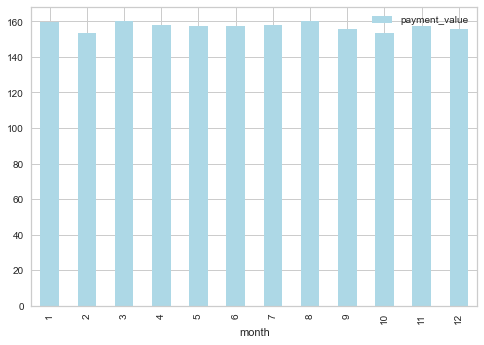

In [45]:
df_bmx.plot(x = 'month', 
            y=['payment_value'], ## Ajouter les labels des mois
            kind = 'bar', 
            color = ['lightblue', 'red', 'yellow'], 
            fontsize=10)


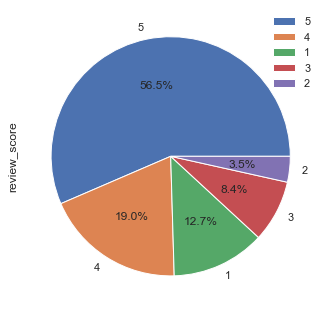

In [99]:
#pie chart for review_score
base_fusion.review_score.value_counts().plot(kind = 'pie',radius=1,autopct='%.1f%%')
plt.legend()
plt.show()

<AxesSubplot:>

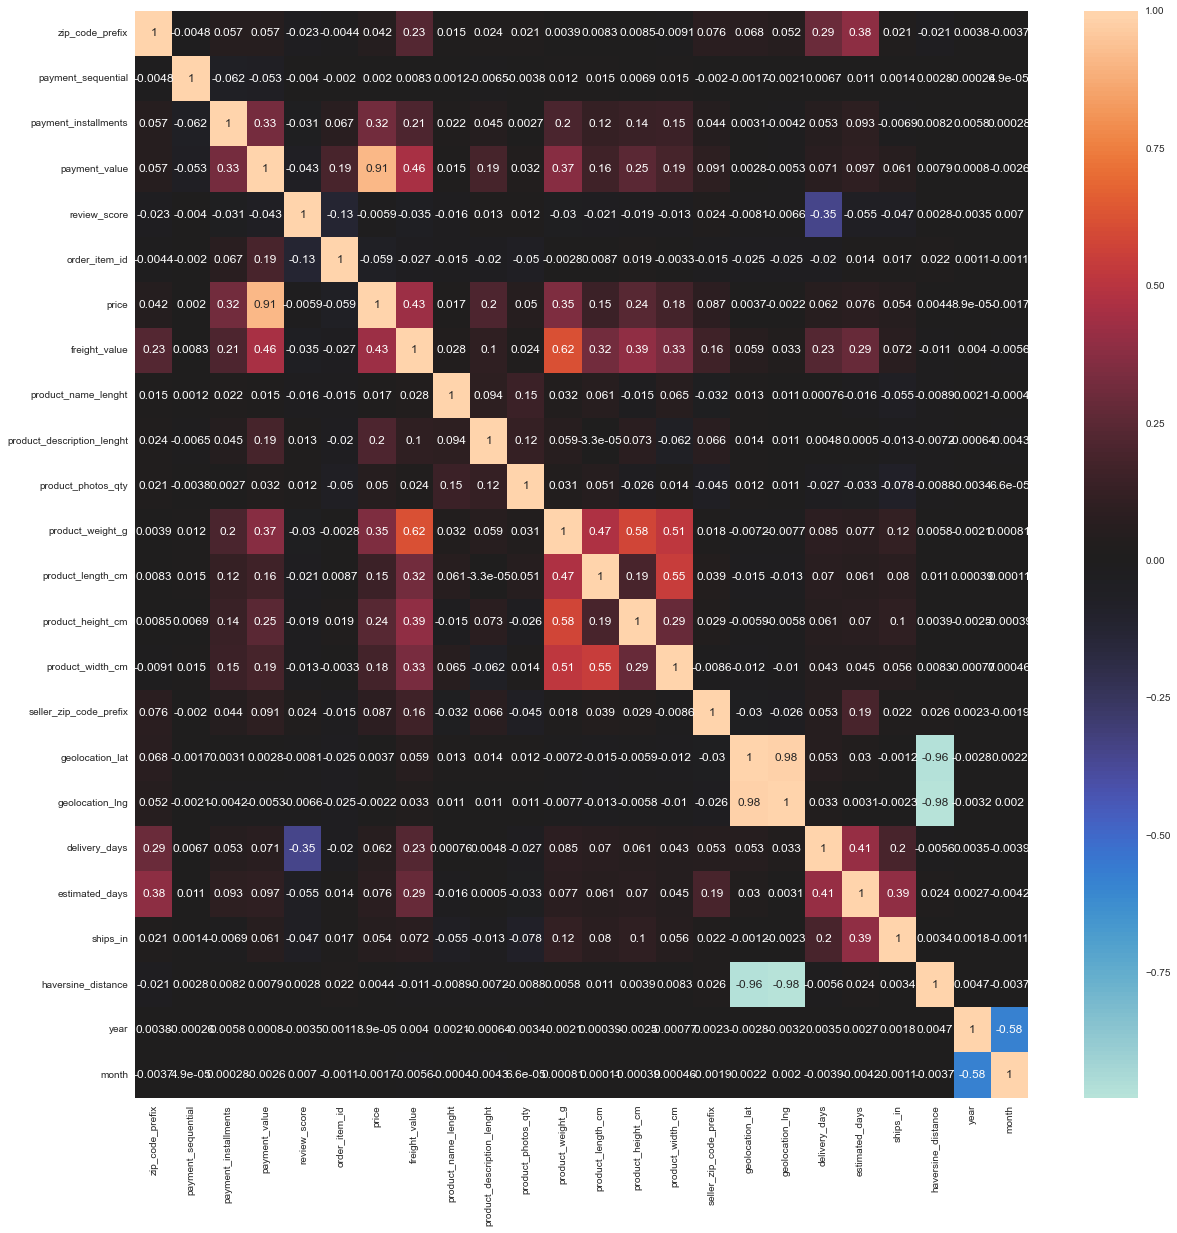

In [46]:
# la matrice de correlation entre nos differentes variables
import matplotlib as mat
import matplotlib.patches as mpatches
corrmat= BaseFinal.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0, vmin=None, vmax=None)

In [51]:
BaseGroupBy=BaseFinal.groupby(by="customer_unique_id").mean()

In [53]:
BaseGroupBy

zip_code_prefix  payment_sequential  \
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2           7787.0                 1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f           6053.0                 1.0   
0000f46a3911fa3c0805444483337064          88115.0                 1.0   
0000f6ccb0745a6a4b88665a16c9f078          66812.0                 1.0   
0004aac84e0df4da2b147fca70cf8255          18040.0                 1.0   
...                                           ...                 ...   
fffcf5a5ff07b0908bd4e2dbc735a684          55250.0                 1.0   
fffea47cd6d3cc0a88bd621562a9d061          44054.0                 1.0   
ffff371b4d645b6ecea244b27531430a          78552.0                 1.0   
ffff5962728ec6157033ef9805bacc48          29460.0                 1.0   
ffffd2657e2aad2907e67c3e9daecbeb          83608.0                 1.0   

                                  payment_installments  payment_value  \
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2                   8.0         141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f                   1.0          27.19   
0000f46a3911fa3c0805444483337064                   8.0          86.22   
0000f6ccb0745a6a4b88665a16c9f078                   4.0          43.62   
0004aac84e0df4da2b147fca70cf8255                   6.0         196.89   
...                                                ...            ...   
fffcf5a5ff07b0908bd4e2dbc735a684                  10.0        2067.42   
fffea47cd6d3cc0a88bd621562a9d061                   1.0          84.58   
ffff371b4d645b6ecea244b27531430a                   1.0         112.46   
ffff5962728ec6157033ef9805bacc48                   5.0         133.69   
ffffd2657e2aad2907e67c3e9daecbeb                   4.0          71.56   

                                  review_score  order_item_id   price  \
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2           5.0            1.0  129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           4.0            1.0   18.90   
0000f46a3911fa3c0805444483337064           3.0            1.0   69.00   
0000f6ccb0745a6a4b88665a16c9f078           4.0            1.0   25.99   
0004aac84e0df4da2b147fca70cf8255           5.0            1.0  180.00   
...                                        ...            ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684           5.0            1.5  785.00   
fffea47cd6d3cc0a88bd621562a9d061           4.0            1.0   64.89   
ffff371b4d645b6ecea244b27531430a           5.0            1.0   89.90   
ffff5962728ec6157033ef9805bacc48           5.0            1.0  115.00   
ffffd2657e2aad2907e67c3e9daecbeb           5.0            1.0   56.99   

                                  freight_value  product_name_lenght  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2          12.00                 60.0   
0000b849f77a49e4a4ce2b2a4ca5be3f           8.29                 56.0   
0000f46a3911fa3c0805444483337064          17.22                 49.0   
0000f6ccb0745a6a4b88665a16c9f078          17.63                 43.0   
0004aac84e0df4da2b147fca70cf8255          16.89                 58.0   
...                                         ...                  ...   
fffcf5a5ff07b0908bd4e2dbc735a684         248.71                 54.0   
fffea47cd6d3cc0a88bd621562a9d061          19.69                 37.0   
ffff371b4d645b6ecea244b27531430a          22.56                 57.0   
ffff5962728ec6157033ef9805bacc48          18.69                 35.0   
ffffd2657e2aad2907e67c3e9daecbeb          14.57                 45.0   

                                  product_description_lenght  ...  \
customer_unique_id                                            ...   
0000366f3b9a7992bf8c76cfdf3221e2                       236.0  ...   
0000b849f77a49e4a4ce2b2a4ca5be3f        

In [54]:
BaseGroupBy.drop(["price","product_description_lenght",'zip_code_prefix',
           "product_length_cm",'geolocation_lat','year','product_weight_g',
           "product_height_cm",'geolocation_lng','seller_zip_code_prefix','product_name_lenght',
           "year"], axis=1, inplace=True)

In [55]:
categorical_features = list(BaseGroupBy.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns)
categorical_features

[]

In [56]:
numerical_features = list(BaseGroupBy.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features

['payment_sequential',
 'payment_installments',
 'payment_value',
 'review_score',
 'order_item_id',
 'freight_value',
 'product_photos_qty',
 'product_width_cm',
 'delivery_days',
 'estimated_days',
 'ships_in',
 'haversine_distance',
 'month']

In [57]:
BaseGroupBy[numerical_features].describe()

payment_sequential  payment_installments  payment_value  review_score  \
count        88542.000000          88542.000000   88542.000000  88542.000000   
mean             1.022891              2.901439     157.627798      4.155589   
std              0.186196              2.678873     216.063840      1.278538   
min              1.000000              0.000000       1.856818      1.000000   
25%              1.000000              1.000000      60.682500      4.000000   
50%              1.000000              2.000000     103.400000      5.000000   
75%              1.000000              4.000000     174.770000      5.000000   
max             13.500000             24.000000   13664.080000      5.000000   

       order_item_id  freight_value  product_photos_qty  product_width_cm  \
count   88542.000000   88542.000000        88542.000000      88542.000000   
mean        1.070888      20.183179            2.257827         23.025699   
std         0.266553      15.658551            1.737524         11.613106   
min         1.000000       0.000000            1.000000          6.000000   
25%         1.000000      13.370000            1.000000         15.000000   
50%         1.000000      16.420000            2.000000         20.000000   
75%         1.000000      21.208750            3.000000         30.000000   
max        11.000000     409.680000           20.000000        118.000000   

       delivery_days  estimated_days      ships_in  haversine_distance  \
count   88542.000000    88542.000000  88542.000000        88542.000000   
mean       11.947341       23.332487      6.374072           62.973019   
std         8.779382        8.680056      3.140616           84.870049   
min         0.000000        2.000000      2.000000            0.000000   
25%         6.000000       18.000000      5.000000           14.825609   
50%        10.000000       23.000000      6.000000           29.550728   
75%        15.000000       28.000000      7.000000           76.509721   
max        99.000000       99.000000     97.000000         2343.006052   

              month  
count  88542.000000  
mean       6.041822  
std        3.261697  
min        1.000000  
25%        3.000000  
50%        6.000000  
75%        8.000000  
max       12.000000

### Détection des valeurs aberrantes

In [58]:
## Fonction de boxplot pour chaque variable
def NumVarBoxPlot(Data):
    for columns in Data.columns:
        plt.figure(figsize = (8,1))
        sns.boxplot(x = Data[columns])
        titre = 'Répartition de : '+ columns
        plt.title(titre)
        plt.xlabel(columns)
        plt.show()
    sns.set(font_scale = 1)

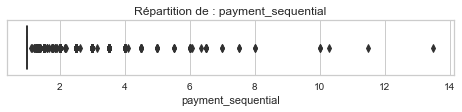

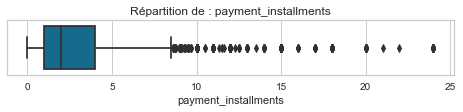

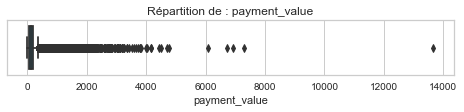

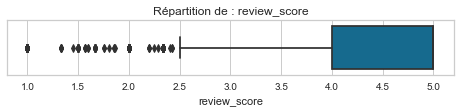

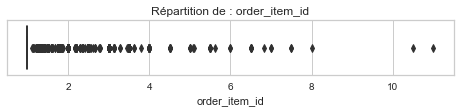

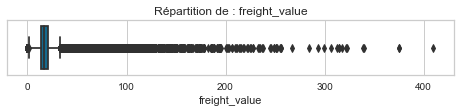

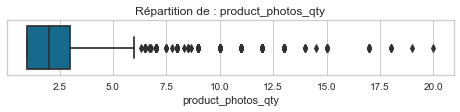

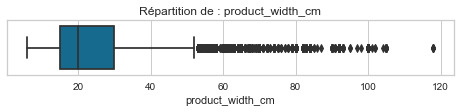

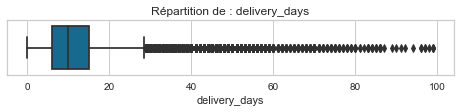

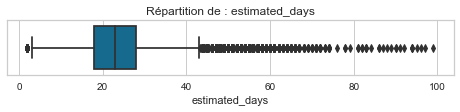

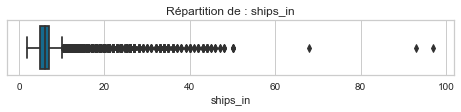

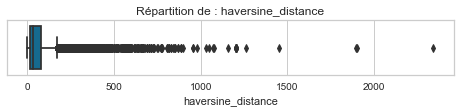

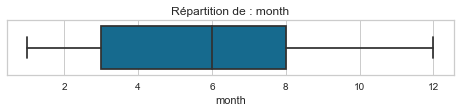

In [59]:
NumVarBoxPlot(BaseGroupBy[numerical_features])

In [60]:
## Fontion de correction des valeurs aberrantes
def CorrectionAbValue(Data,ab):
    listVarExclu=list(ab)
    for columns in Data.columns:
        if (columns not in listVarExclu):
            mediane = np.median(Data[columns])

            intqt = 1.5*(np.percentile(Data[columns], 75) - np.percentile(Data[columns], 25))
            lim_sup = intqt  + np.percentile(Data[columns], 75)
            lim_inf = np.percentile(Data[columns], 25) - intqt

            for ligne in Data[columns]:
                if (ligne > lim_sup or ligne < lim_inf):
                    Data[columns] = Data[columns].replace(ligne , mediane)


In [61]:
CorrectionAbValue(BaseGroupBy,['order_item_id','month'])

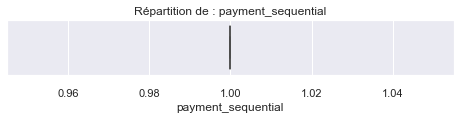

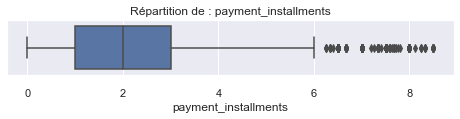

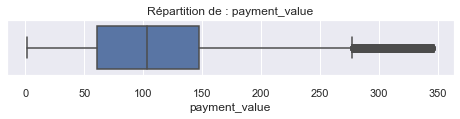

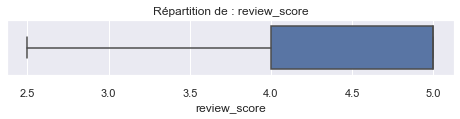

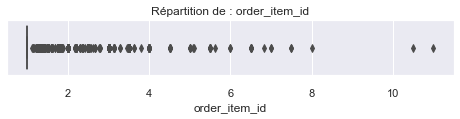

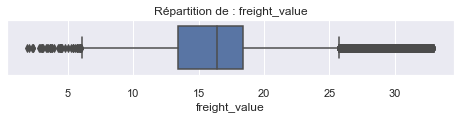

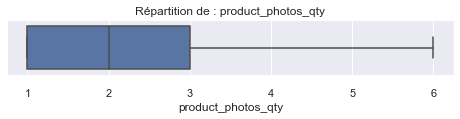

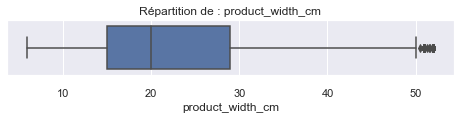

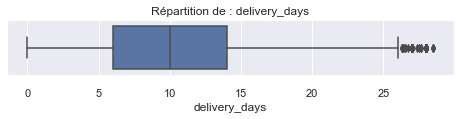

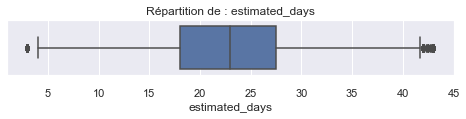

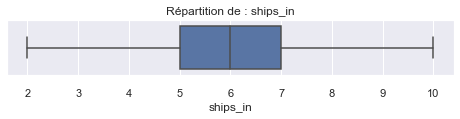

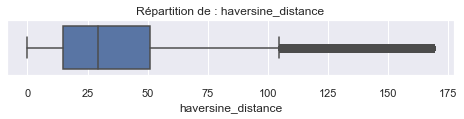

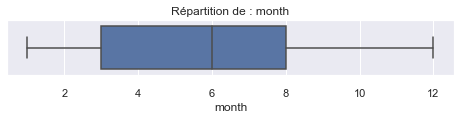

In [62]:
## Visualisation après une première correction
NumVarBoxPlot(BaseGroupBy[numerical_features])

In [63]:
## Une deuxième correction pour les variables qui contiennent toujours des valeurs aberrantes
CorrectionAbValue(BaseGroupBy,['order_item_id','month','ships_in','product_photos_qty','review_score','payment_sequential'])

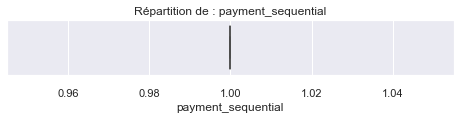

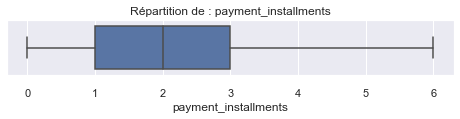

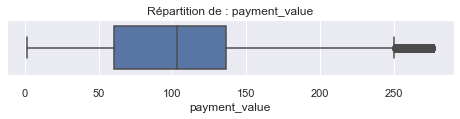

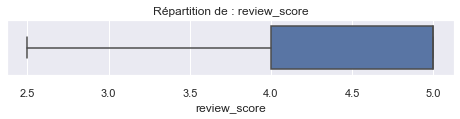

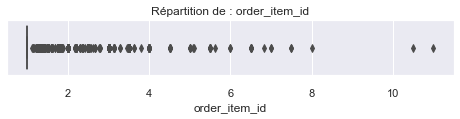

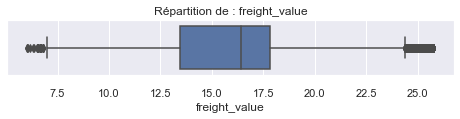

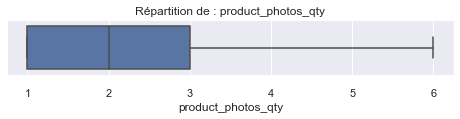

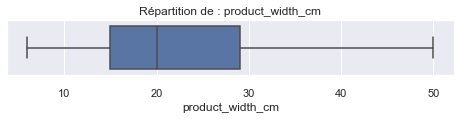

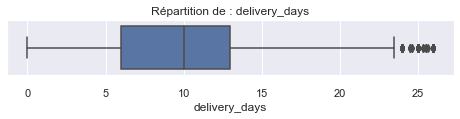

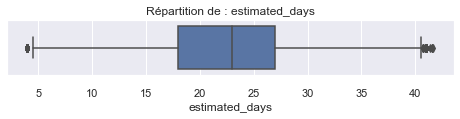

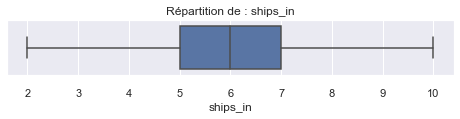

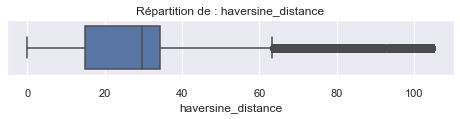

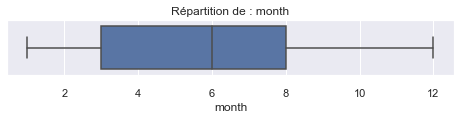

In [64]:
## Visualisation après une deuxième correction
NumVarBoxPlot(BaseGroupBy[numerical_features])

In [65]:
## Une troisième correction pour les variables qui contiennent toujours des valeurs aberrantes
CorrectionAbValue(BaseGroupBy,['order_item_id','month','ships_in',
                               'product_photos_qty','review_score','payment_sequential',
                              'product_width_cm','payment_installments'])

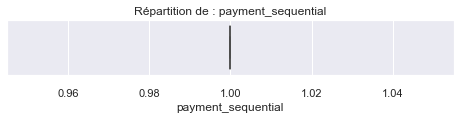

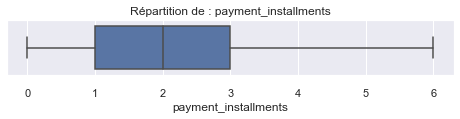

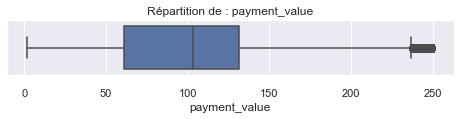

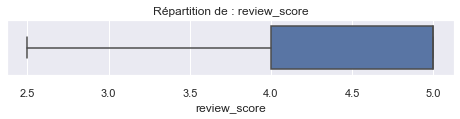

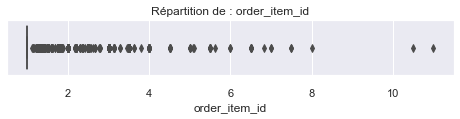

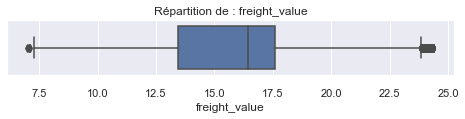

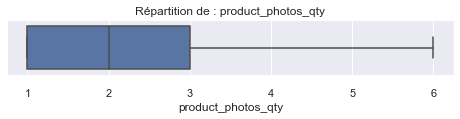

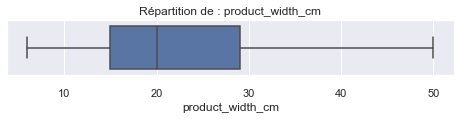

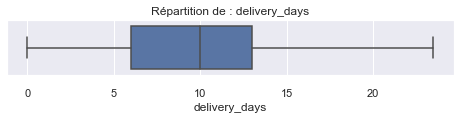

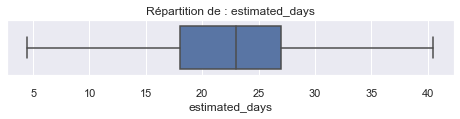

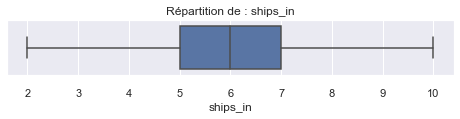

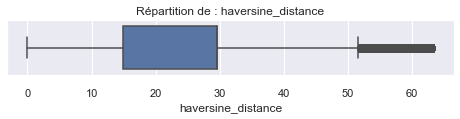

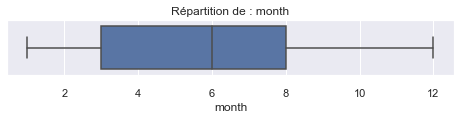

In [67]:
## Visualisation après une troisième correction
NumVarBoxPlot(BaseGroupBy[numerical_features])

In [68]:
## Une quatrième correction pour les variables qui contiennent toujours des valeurs aberrantes
CorrectionAbValue(BaseGroupBy,['order_item_id','month','ships_in',
                               'product_photos_qty','review_score','payment_sequential',
                              'product_width_cm','payment_installments'])

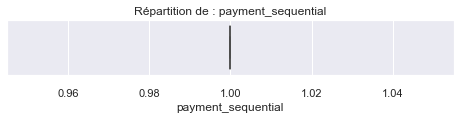

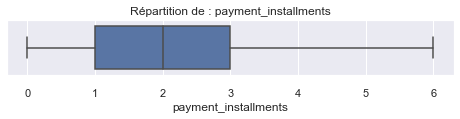

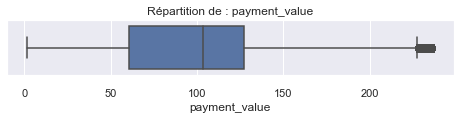

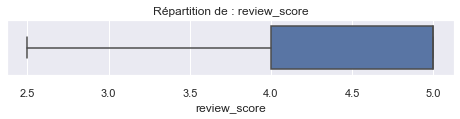

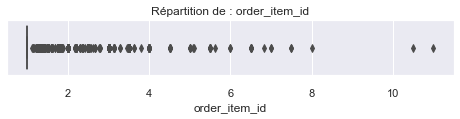

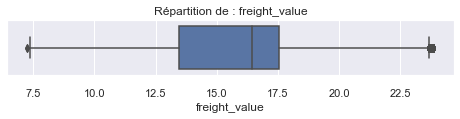

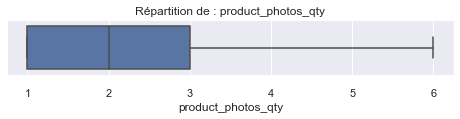

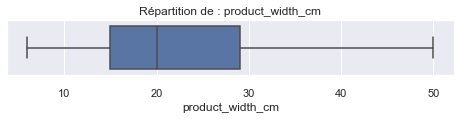

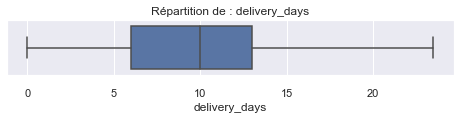

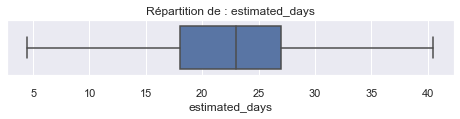

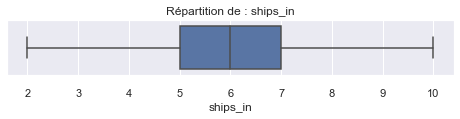

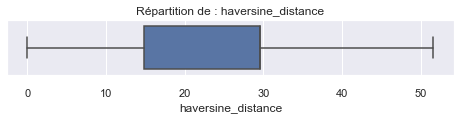

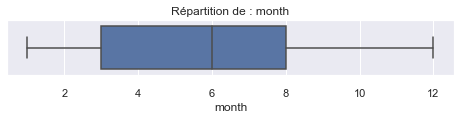

In [69]:
## Visualisation après une quatrième correction
NumVarBoxPlot(BaseGroupBy[numerical_features])

# <a id="6"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

In [70]:
from sklearn.compose import ColumnTransformer, make_column_transformer
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

In [71]:
X = BaseGroupBy.copy()

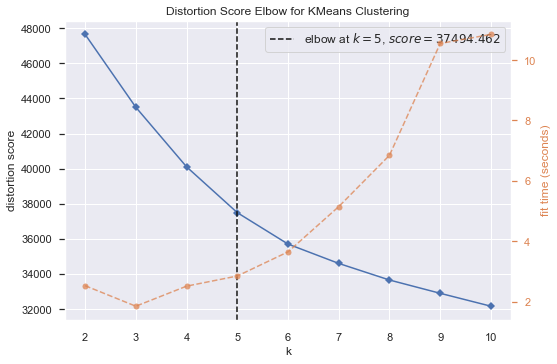

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
from sklearn.pipeline import Pipeline, make_pipeline
X = BaseGroupBy.copy()
# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

Grâce à la méthode du coude basée sur le score de distortion (somme moyenne des carrés des distances aux centres), une segementation en  K=5 clusters serait la meilleure option

# Coefficient de silhouette

Pour vérifier si ce clustering fonctionne, nous allons utiliser SilhouetteVisualizer pour afficher le coefficient de silhouette pour un échantillonage de chaque cluster. Cela permet de visualiser la densité et la séparation des clusters.

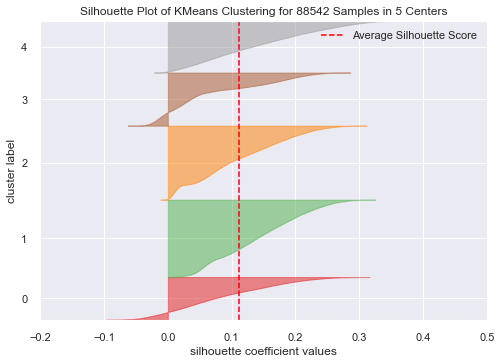

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 88542 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [73]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(X)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

Le score de chaque échantillon est calculé en faisant la moyenne du coefficient de silhouette (différence entre la distance moyenne intra-cluster et la distance moyenne du cluster le plus proche pour chaque échantillon), normalisée par la valeur maximale. Cela nous donne un score entre -1 et 1, qui nous permet de déterminer si la séparation est efficace ou si les points sont assignés au mauvais cluster.

Ici, les clusters semblent relativement bien répartis et les séparations sont claires avec cependant quelques erreurs sur l'un des clusters.

A présent, nous allons tester d'autres types de métriques pour trouver le meilleur K :

* Silouhette : rapport moyen entre la distance intra-cluster et la distance du cluster le plus proche,
* Calinski Harabasz : rapport entre la dispersion des grappes dans et entre les groupes.

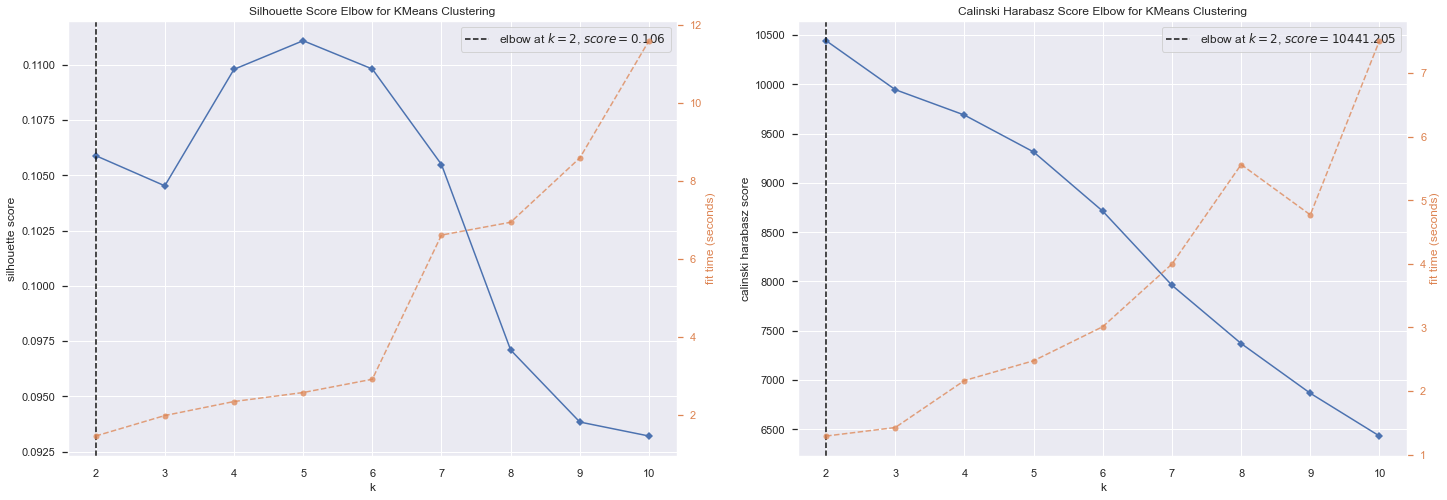

In [87]:
# Elbow method with differents metrics
metrics = ["silhouette", "calinski_harabasz"]
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(24,8))
for m in metrics:
    kmeans_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("kelbowvisualizer", KElbowVisualizer(KMeans(),
                                              K=(4,10),
                                              metric=m,
                                              ax=axes[i]))])
    kmeans_visualizer.fit(X)
    kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
    i+=1

plt.show()

On remarque ici que pour la métrique silhouette score, le nombre de K est également 2. Pour le score Calinski Harabasz, le meilleur K est plus incertain. Les scores pour la répartition en 5 clusters semblent être meilleurs. Nous allons donc conserver ce clustering en 5 groupes

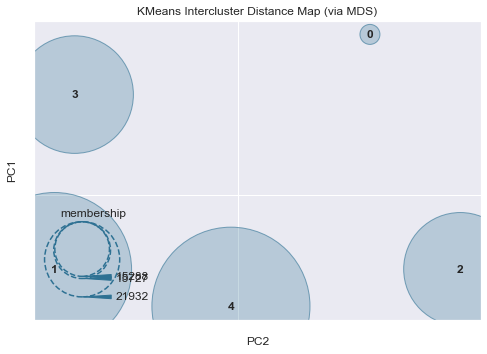

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [74]:
# Intercluster distance Map with best k
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(X)
distance_visualizer.named_steps['distancevisualizer'].show()

Sur cette projection en 2D, on remarque que les différents clusters sont bien séparés sur les 2 premières composantes principales. Le clustering semble donc performant et il faut à présent identifier les composantes métier de chaque cluster.

Analyse des différents clusters

A présent, nous allons entrainer notre KMeans avec le K optimal sélectionné et affecter son cluster à chaque client. Ainsi, nous pourrons analyser les différences entre chaque cluster :

In [75]:
# KMeans Pipeline with best K
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans(K))])
kmeans_model.fit(X)

# Kmeans labels
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
BaseGroupBy["kmeans_label"] = kmeans_labels

In [76]:
kmeans_clusters_means = BaseGroupBy.groupby("kmeans_label").mean().reset_index()
kmeans_clusters_means

kmeans_label  payment_sequential  payment_installments  payment_value  \
0             0                 1.0              1.626372      68.151646   
1             1                 1.0              2.189881     108.022297   
2             2                 1.0              2.214407     110.063258   
3             3                 1.0              2.148071     104.967323   
4             4                 1.0              2.085474     102.170103   

   review_score  order_item_id  freight_value  product_photos_qty  \
0      4.778198       1.066639      10.195807            1.749035   
1      4.864039       1.074642      16.633561            1.597047   
2      4.996439       1.080285      16.844457            1.540611   
3      3.576848       1.073768      16.400713            1.679016   
4      4.701318       1.048966      15.812783            4.788518   

   product_width_cm  delivery_days  estimated_days  ships_in  \
0         18.436881       5.032579       14.826919  5.370103   
1         22.811791      11.020459       24.525669  5.883181   
2         22.997010      11.103470       24.863637  5.916751   
3         22.748624      11.586526       24.411027  5.918341   
4         21.908017       9.758773       22.672744  5.592343   

   haversine_distance     month  
0           22.243202  5.852538  
1           23.900751  9.558196  
2           24.019137  3.483033  
3           23.505202  5.158517  
4           23.816681  5.906127

In [77]:
X_scaled = preprocessor.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled["kmeans_label"] = kmeans_labels
X_scaled_clusters = X_scaled.groupby("kmeans_label").mean().reset_index()
X_scaled_clusters

kmeans_label  payment_sequential  payment_installments  payment_value  \
0             0                 0.0              0.271062       0.282102   
1             1                 0.0              0.364980       0.451762   
2             2                 0.0              0.369068       0.460447   
3             3                 0.0              0.358012       0.438762   
4             4                 0.0              0.347579       0.426859   

   review_score  order_item_id  freight_value  product_photos_qty  \
0      0.911279       0.006664       0.176573            0.149807   
1      0.945616       0.007464       0.565091            0.119409   
2      0.998576       0.008028       0.577819            0.108122   
3      0.430739       0.007377       0.551039            0.135803   
4      0.880527       0.004897       0.515557            0.757704   

   product_width_cm  delivery_days  estimated_days  ships_in  \
0          0.282656       0.214152        0.286859  0.421263   
1          0.382086       0.468956        0.556269  0.485398   
2          0.386296       0.472488        0.565657  0.489594   
3          0.380651       0.493044        0.553084  0.489793   
4          0.361546       0.415267        0.504798  0.449043   

   haversine_distance     month  
0            0.431192  0.441140  
1            0.463324  0.778018  
2            0.465619  0.225730  
3            0.455656  0.378047  
4            0.461694  0.446012

In [78]:
import plotly.graph_objs as go
def plot_radars(BaseGroupBy, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(BaseGroupBy), 
                        index=BaseGroupBy.index,
                        columns=BaseGroupBy.columns).reset_index()
    
    fig = go.Figure()

    for k in BaseGroupBy[group]:
        fig.add_trace(go.Scatterpolar(
            r=BaseGroupBy[BaseGroupBy[group]==k].iloc[:,1:].values.reshape(-1),
            theta=BaseGroupBy.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.1,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()

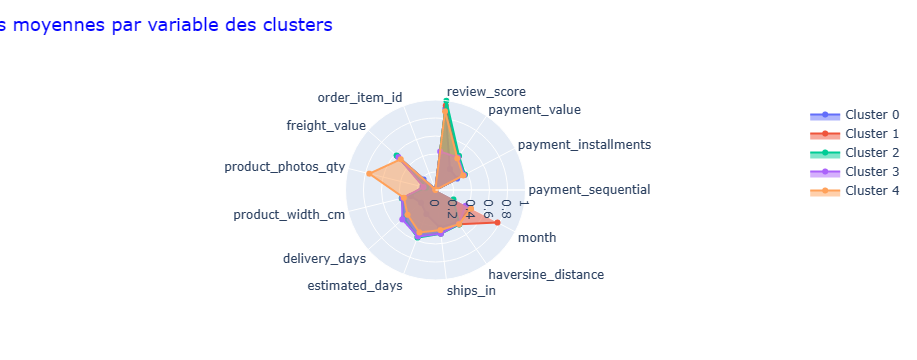

In [79]:
plot_radars(BaseGroupBy=X_scaled_clusters,
            group="kmeans_label")

# Interprétation métier des clusters

* Groupe 1 : Clients proches géographiquement avec de courts délais de livraison, commandant principalement en fin du mois pour des montants faibles. Ils paient en tranche tres faibles. Les avis de ces clients sont très bons.
* Groupe 2 : Clients de fin du mois. la valeur des frais qu'ils paient est trés élevée montants faibles. Ces clients sont géographiquement proche et les délais de livraison sont courts. Les avis de ces clients sont également très bons.
* Groupe 3 :  Clients en début de du mois. Pour ces clients le nombres de jours estimé  pour la livraison est élevé. Les avis de ces clients sont également très bons.
* Groupe 4 : Ce sont des clients mécontants (les avis sont mauvais). Les délais de livraison sont très importants et les frais de port élevés en raison de l'éloignement géographique. Cependant, géographiquement ces clients sont rapprochés
* Groupe 5 : Ces clients ont passé un nombre important de commandes et sont satisfaits. Ils sont géographiquement proches.Pour ces clients la livraison se fait en fin du mois.

Nous allons à présent réaliser une réduction dimensionnelle pour vérifier si le clustering est réalisable sur un nombre réduit de variables sans perturber les groupes

# <a id="7"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">PCA</p>

# reduction de la dimentionnalité

In [80]:
# PCA Pipeline
pca = Pipeline([("preprocessor", MinMaxScaler()),
                ("pca", PCA(svd_solver='full'))])
pca.fit(X)
X_projected = pca.transform(X)

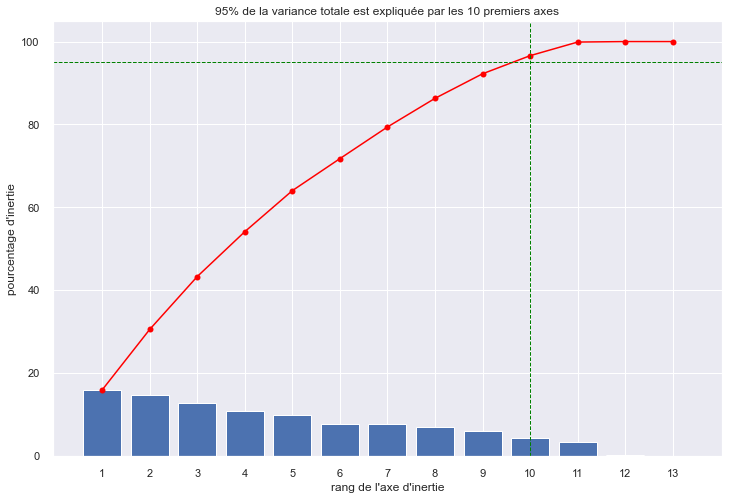

In [81]:
# Explained variance
varexpl = pca.named_steps['pca'].explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

Il faut donc conserver 10 axes principaux pour expliquer la variance à 95%

In [ ]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, 
               labels=None, label_rotation=0):
    
    fig=plt.figure(figsize=(20,n_comp*5))
    count=1
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            #fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=plt.subplot(int(n_comp/2),2,count)
            ax.set_aspect('equal', adjustable='box') 
            
            #détermination des limites du graphique
            ax.set_xlim(-1,1) 
            ax.set_ylim(-1,1) 

            #affichage des flèches 
            ax.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                ax.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8) 

            #ajouter les axes 
            ax.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
            ax.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

            #ajouter un cercle 
            cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
            ax.add_artist(cercle) 

            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel('F{} ({}%)'.format(d1+1, 
                                          round(100*pca.explained_variance_ratio_[d1],1)))
            ax.set_ylabel('F{} ({}%)'.format(d2+1, 
                                          round(100*pca.explained_variance_ratio_[d2],1)))

            ax.set_title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            count+=1
            
    plt.suptitle("Cercles des corrélations sur les {} premiers axes".format(n_comp),
                 y=.9, color="blue", fontsize=18)        
    plt.show(block=False)

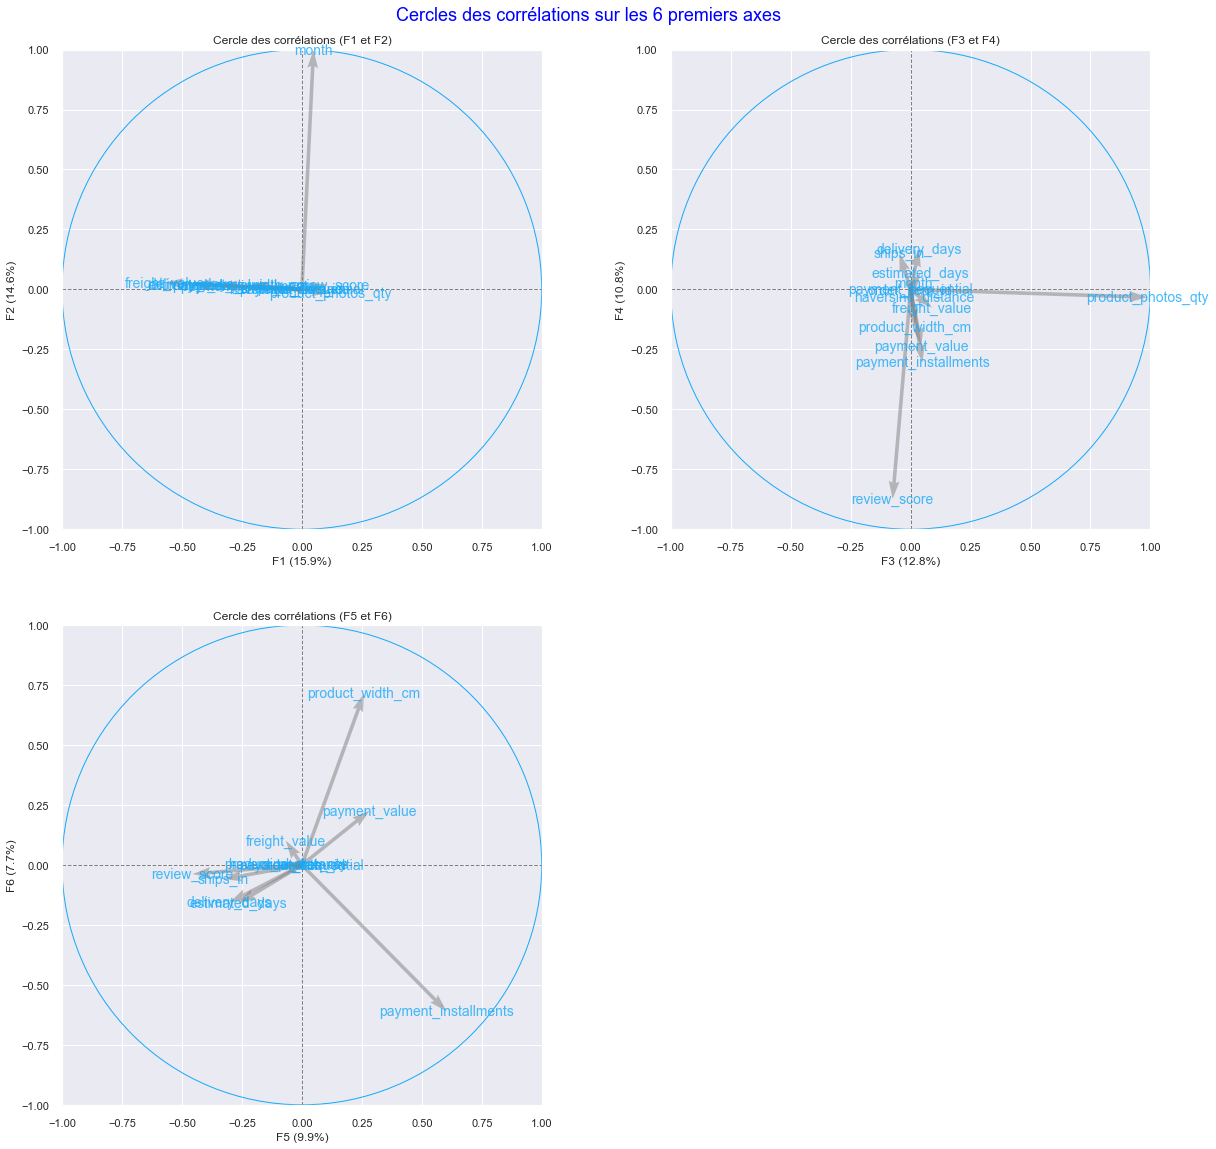

In [83]:
# Principal component space
pcs = pca.named_steps['pca'].components_

# Plot correlation circle
cerle_corr(pcs,
           6,
           pca.named_steps['pca'],
           [(0,1),(2,3),(4,5)],
           labels = np.array(X.columns))

On peut ainsi voir parfaitement les variables qui contribuent le plus à chaque axe. Par exemple, 

* la variable synthétique F2 représentera les périodes d'achats.

* La variable synthétique F3 l'appreciation des clients 

Nous allons donc intégrer à notre pipeline Kmeans une PCA sur 5 composantes pour vérifier si la réduction dimensionnelle réduit la qualité de la segmentation 

In [84]:
# KMeans Pipeline with best K for PCA results
kmeans_model_pca = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_pca.fit(X_projected[:,:4])

# Kmeans labels
pca_kmeans_labels = kmeans_model_pca.named_steps['kmeans'].labels_
X_scaled["kmeans_label"]  = pca_kmeans_labels
X_scaled_clusters_pca = X_scaled.groupby("kmeans_label").mean()
X_scaled_clusters_pca.iloc[:,:-1]

payment_sequential  payment_installments  payment_value  \
kmeans_label                                                            
0                            0.0              0.345295       0.418653   
1                            0.0              0.293898       0.384028   
2                            0.0              0.354199       0.423066   
3                            0.0              0.356679       0.425287   
4                            0.0              0.356553       0.428219   

              review_score  order_item_id  freight_value  product_photos_qty  \
kmeans_label                                                                   
0                 0.861823       0.007133       0.497835            0.156993   
1                 0.404578       0.006777       0.508419            0.131529   
2                 0.941581       0.007582       0.485552            0.115579   
3                 0.962272       0.007861       0.479893            0.101001   
4                 0.854150       0.005003       0.500857            0.753699   

              product_width_cm  delivery_days  estimated_days  ships_in  \
kmeans_label                                                              
0                     0.365125       0.430282        0.510919  0.476954   
1                     0.340878       0.504180        0.547546  0.515669   
2                     0.365172       0.405359        0.496253  0.467364   
3                     0.368411       0.401429        0.490374  0.463733   
4                     0.363079       0.411831        0.497916  0.445260   

              haversine_distance  
kmeans_label                      
0                       0.455326  
1                       0.448299  
2                       0.457173  
3                       0.458329  
4                       0.462134

In [85]:
pd.DataFrame(X_scaled_clusters_pca.reset_index())

kmeans_label  payment_sequential  payment_installments  payment_value  \
0             0                 0.0              0.345295       0.418653   
1             1                 0.0              0.293898       0.384028   
2             2                 0.0              0.354199       0.423066   
3             3                 0.0              0.356679       0.425287   
4             4                 0.0              0.356553       0.428219   

   review_score  order_item_id  freight_value  product_photos_qty  \
0      0.861823       0.007133       0.497835            0.156993   
1      0.404578       0.006777       0.508419            0.131529   
2      0.941581       0.007582       0.485552            0.115579   
3      0.962272       0.007861       0.479893            0.101001   
4      0.854150       0.005003       0.500857            0.753699   

   product_width_cm  delivery_days  estimated_days  ships_in  \
0          0.365125       0.430282        0.510919  0.476954   
1          0.340878       0.504180        0.547546  0.515669   
2          0.365172       0.405359        0.496253  0.467364   
3          0.368411       0.401429        0.490374  0.463733   
4          0.363079       0.411831        0.497916  0.445260   

   haversine_distance     month  
0            0.455326  0.885938  
1            0.448299  0.357916  
2            0.457173  0.134175  
3            0.458329  0.509980  
4            0.462134  0.418946

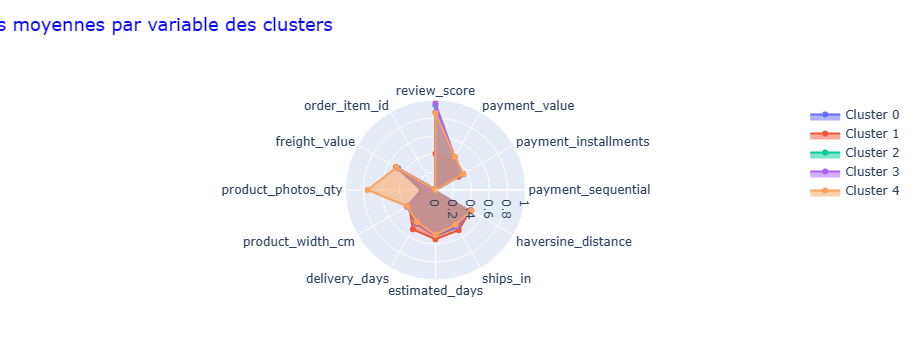

In [86]:
plot_radars(pd.DataFrame(X_scaled_clusters_pca.reset_index()).iloc[:,:-1],
            group="kmeans_label")

# Interprétation métier des clusters aprés PCA

* Groupe 1 : Clients proches géographiquement avec de courts délais de livraison, commandant principalement en en fin du mois pour des montants faibles. Ils paient en tranche tres faibles. Les avis de ces clients sont très bons. on voit que la valeur des  frais est trés élevée.
* Groupe 2 : Clients de fin du mois. la valeur des frais qu'ils paient est trés élevée montants faibles. Ces clients sont géographiquement proches et les délais de livraison sont courts. les avis de ces clients sont mauvais et la valeurs des frais est élévée.
* Groupe 3 :  Clients en début de du mois. Pour ces clients le nombre de jours estimé  pour lalivraison est élevé. Les avis de ces clients sont également très bons.
* Groupe 4 : Ce sont des clients qui ont des avis qui sont bons. Géographiquement, ces clients sont rapprochés
* Groupe 5 : Ces clients ont passé un nombre important de commandes et sont satisfaits. Ils sont géographiquement proches.Pour ces clients la livraison se fait en fin du mois.


------------------------------------------------------